## Imports

In [1]:
import os
import sys
from pathlib import Path
import datetime

import osgeo #needed if running notebook on Windows
import rasterio as rio
import numpy as np
import pandas as pd
from rasterio import plot
from rasterio.plot import show
import matplotlib.pyplot as plt

from ipywidgets import Label
from ipyleaflet  import Map, GeoData, basemaps, LayersControl, ImageOverlay, Marker, Popup
from localtileserver import get_leaflet_tile_layer, TileClient

%matplotlib inline

In [2]:
sys.path.append(r"cropburn")
from timeseries import *

In [4]:
samp_img = "D:/CropBurn/UNQ31/test/20191119_051943_1003_3B_AnalyticMS_SR_harmonized.tif"
local_out_dir = "C:/Users/klobw/Desktop/Testing"
img_dir = "D:/CropBurn/UNQ31/Images_2019"
#img_dir = "D:/CropBurn/UNQ31/test"
grid_file = "D:/CropBurn/Grid_Punjab_UTM.gpkg"
#grid_file = "../data/Grid_Punjab_7773_small.gpkg"
#ground_polys = "D:/CropBurn/UNQ31/polys/char18_poly.shp"
ground_polys = "C:/Users/klobw/Desktop/PunjabBurning/CRB_Product_assessment/RS_mat/charpolys17_31n46F.shp"
#samp_img = os.path.join(img_dir,os.listdir(img_dir)[0])

In [ ]:
#make_thumbnails(img_dir,"D:/CropBurn/UNQ31/thumb",1,'431',reduct_factor=5)

In [ ]:
rgb = plot_img(samp_img, 1, '431')
fig = plt.figure(figsize=(18,12))
plt.imshow(rgb);

In [ ]:
masked = mask_clouds(samp_img, 'udm2csorig')
fig = plt.figure(figsize=(18,12))
plt.imshow(masked.sel(band=4));

In [5]:
tile_client = TileClient(samp_img)
m = Map(center=tile_client.center(), zoom=12, basemap=basemaps.Esri.WorldImagery)
t = get_leaflet_tile_layer(tile_client, band=[4,3,1])
m.add_layer(t)
add_shpfile_to_map('poly', ground_polys,32643,m)

def get_coords(**kwargs):
    if kwargs.get('type') == 'click':
        label = Label()
        label.value = str(kwargs.get('coordinates'))
        #m.add_layer(Marker(location=kwargs.get('coordinates')))
        coords =eval(label.value) 
        selected_coords.append(coords)
        print(selected_coords)
        return selected_coords
selected_coords = []
m.on_interaction(get_coords)

print('click on map to get coordinates to query (can zoom in first)')
m

click on map to get coordinates to query (can zoom in first)


Map(center=[30.29061609957799, 74.74690879173083], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [6]:
#coords = convert_and_print_coord_list(selected_coords, img_crs=32643, out_dir=local_out_dir)
#coords = pd.read_csv(os.path.join(local_out_dir,'SelectedCoords.csv'))
coords = pd.read_csv("../cropburn/data/sample_burn_pts.csv")
print(coords)

   id        lon        lat  XCoord   YCoord      burn
0   1  30.501737  74.892226  489658  3374388  20191105
1   2  30.493719  74.910455  491406  3373498  20191105
2   3  30.504082  74.907542  491128  3374647  20191105
3   4  30.495960  74.918636  492191  3373746  20191029


In [7]:
vals = get_values_at_coords(coords, 32643, samp_img, [1,2,3])

for index, pt in coords.iterrows():
    marker = Marker(location = [pt.lon,pt.lat])
    popup = Popup(
        location=[pt.lon,pt.lat],
        close_button=False,
        auto_close=False,
        close_on_click=False,
        close_on_escape_key=False
    )
    popup.children = "{}: {}/{}/{}".format(index+1,vals[1][index],vals[2][index],vals[3][index])
    print(popup.children)
    message=Label()
    message.value = popup.children
    marker.popup = message
    m.add_layer(marker)

display(m)

1: 0/0/0
2: 0/0/0
3: 0/0/0
4: 0/0/0


Map(bottom=431838.0, center=[30.29061609957799, 74.74690879173083], controls=(ZoomControl(options=['position',…

In [ ]:
## Add masks first

In [13]:
coords = "../cropburn/data/sample_burn_pts.csv"
ts = get_timeseries_for_pts_multicell(local_out_dir, 'CI', 2019, 2019, img_dir, 'Planet', grid_file, [31], ground_polys,
            npts=3, apply_masks=True, seed=889, load_samp=True, ptfile=coords)

working on cell 31
grid is in:  EPSG:32643
                                            geometry
0  POLYGON ((497782.972 3370269.186, 497782.972 3...
Of the 4 ppts, 4 are in gridCell 31
                          geometry
id                                
1   POINT (489658.000 3374388.000)
2   POINT (491406.000 3373498.000)
3   POINT (491128.000 3374647.000)
4   POINT (492191.000 3373746.000)


C:\Users\klobw\AppData\Local\Temp\ipykernel_29360\1827732060.py:2: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  ts = get_timeseries_for_pts_multicell(local_out_dir, 'CI', 2019, 2019, img_dir, 'Planet', grid_file, [31], ground_polys,


found overlap with 20191010_040951_1052_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191010_051018_0e20_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191010_051019_0e20_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191010_051020_0e20_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191010_051021_0e20_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191012_051951_103b_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191012_051952_103b_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191012_051953_103b_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191012_052043_103c_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191012_052044_103c_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191012_052045_103c_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191013_040800_0f2b_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191013_040801_0f2b_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191013_040802_0f2b_3B_AnalyticMS_SR_harmoni

found overlap with 20191124_040202_0f32_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191124_040203_0f32_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191124_040204_0f32_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191124_054110_20_1064_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191124_054112_24_1064_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_040222_1049_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_040223_1049_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_040224_1049_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_040225_1049_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_051010_0e3a_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_051011_0e3a_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_051012_0e3a_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_054853_37_1065_3B_AnalyticMS_SR_harmonized.tif
found overlap with 20191125_054855_46_1065_3B_AnalyticM

ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191014_051130_0e20_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191015_055034_95_1067_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191015_055037_01_1067_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191016_055132_35_1062_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
index val = 6646.0
ptid=2,coord=POINT (491406 3373498)
index val = 7167.0
ptid=3,coord=POINT (491128 3374647)
index val = 7059.0
pt

ptid=1,coord=POINT (489658 3374388)
index val = 5837.0
ptid=2,coord=POINT (491406 3373498)
index val = 11128.0
ptid=3,coord=POINT (491128 3374647)
index val = 6697.0
ptid=4,coord=POINT (492191 3373746)
index val = 9805.0
found a mask!: 20191026_040740_0f1a_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191026_051827_1001_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191026_051828_1001_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
index val = 5209.0
ptid=2,coord=POINT (491406 3373498)
index val = 10925.0
ptid=3,coord=POINT (491128 3374647)
index val = 6067.0
ptid=4,coord=POINT (492191 3373746)
index val = 10627.0
found a mask!: 20191026_051829_1001_3B_udm2.tif
masking image
ptid=1,coord=POINT (4

ptid=1,coord=POINT (489658 3374388)
index val = 4541.000000000001
ptid=2,coord=POINT (491406 3373498)
index val = 3753.9999999999995
ptid=3,coord=POINT (491128 3374647)
index val = 3871.0
ptid=4,coord=POINT (492191 3373746)
index val = 6899.0
problem masking D:/CropBurn/UNQ31/Images_2019\20191110_052028f_1008_3B_AnalyticMS_SR_harmonized.tif
ptid=1,coord=POINT (489658 3374388)
index val = 4541.000000000001
ptid=2,coord=POINT (491406 3373498)
index val = 3753.9999999999995
ptid=3,coord=POINT (491128 3374647)
index val = 3871.0
ptid=4,coord=POINT (492191 3373746)
index val = 6899.0
found a mask!: 20191110_052029_1008_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191117_040211_0f4d_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
fo

ptid=1,coord=POINT (489658 3374388)
index val = 6341.0
ptid=2,coord=POINT (491406 3373498)
index val = 7304.000000000001
ptid=3,coord=POINT (491128 3374647)
index val = 6436.999999999999
ptid=4,coord=POINT (492191 3373746)
index val = 6309.0
found a mask!: 20191125_040224_1049_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191125_040225_1049_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191125_051010_0e3a_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191125_051011_0e3a_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
index val = 5783.0
ptid=2,coord=POINT (491

ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191204_052311_1008_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191204_052312_1008_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191204_053748_73_1060_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191205_052229_103e_3B_udm2.tif
masking image
ptid=1,coord=POINT (489658 3374388)
ptid=2,coord=POINT (491406 3373498)
ptid=3,coord=POINT (491128 3374647)
ptid=4,coord=POINT (492191 3373746)
found a mask!: 20191205_05223

In [ ]:
# with polygons instead of interactive coords:
ts_masked = get_timeseries_for_pts_multicell(local_out_dir, 'CI', 2019, 2019, img_dir, 'Planet', grid_file, [31], ground_polys,
            npts=1, apply_masks=True, seed=889, load_samp=False, ptfile=None)
#ts_dos = convert_timeseries_to_doy(ts_masked, 2019, start_day=283, end_day=354, season=True)

In [10]:
ts_dos_masked = convert_timeseries_to_doy(ts, 2019, start_day=283, end_day=354, season=True)

In [11]:
ts_dos_masked

,1,2,3,4,ALL,stdv
date,,,,,,
1,3881.000000,3671.0,4144.0,3390.000000,3771.500000,276.762082
3,3732.000000,NaN,NaN,NaN,3732.000000,0.000000
4,3861.500000,3604.0,4037.0,3418.500000,3730.250000,236.880376
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,3808.000000,3591.0,4128.0,3543.000000,3767.500000,230.842479
8,NaN,NaN,NaN,NaN,NaN,NaN
11,3093.500000,2984.0,3267.0,3051.000000,3098.875000,104.622162
12,3525.000000,3356.0,3745.5,3864.000000,3622.625000,196.201228


In [12]:
ts_dos = ts_dos_masked
ts_dos_diff = get_image_diffs(ts_dos)
ts_dos_diff

,1,2,3,4,ALL,stdv
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,129.5,-67.0,-107.0,28.500000,-1.750000,236.880376
4,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,-53.5,-13.0,91.0,124.500000,37.250000,-6.037897
7,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#masked_nir = load_ts_from_file(os.path.join(local_out_dir,'TS_nir_2019-2019_17polys_masked.csv'))
masked_nir = load_ts_from_file("../cropburn/data/samp_ts/TS_nir_2019-2019_4pts_masked.csv")
nir_dos = convert_timeseries_to_doy(masked_nir, 2019, start_day=283, end_day=354, season=True)  
masked_CI = load_ts_from_file("../cropburn/data/samp_ts/TS_CI_2019-2019_4pts_masked.csv")
CI_dos = convert_timeseries_to_doy(masked_CI, 2019, start_day=283, end_day=354, season=True)  

In [ ]:
CI_dos

Text(0.5, 1.0, 'point 4')

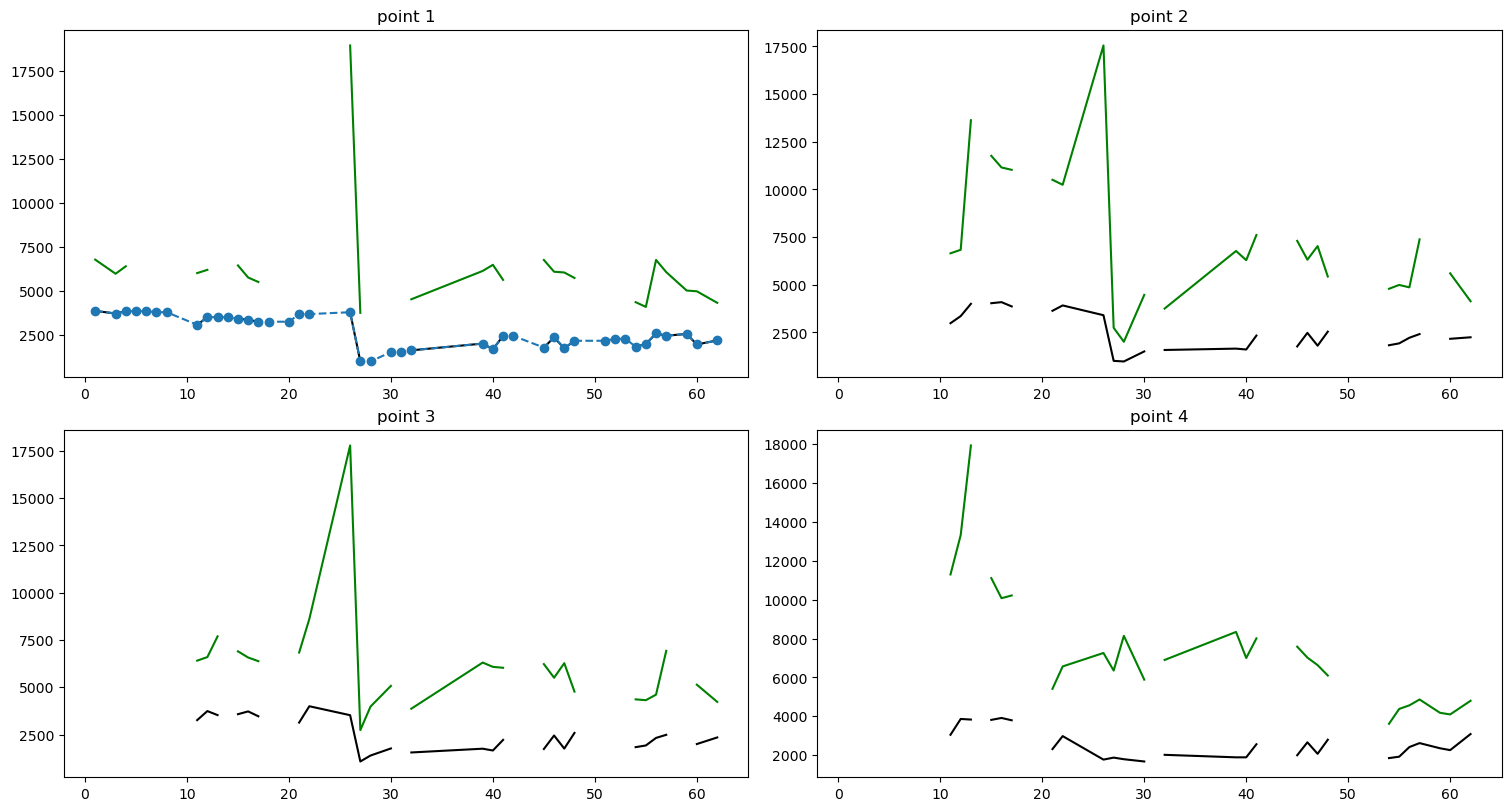

In [37]:
nir_dos['1_ffill'] = nir_dos['1'].ffill()

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 8), layout="constrained")         
#axs[0,0].scatter(nir_dos.index, nir_dos['1'], color='k')
axs[0,0].plot(nir_dos.index,nir_dos['1'], color='k')
axs[0,0].plot(nir_dos['1_ffill'], linestyle='--', marker='o')
#axs[0,0].scatter(CI_dos.index, CI_dos['1'], color='g')
axs[0,0].plot(CI_dos['1'], color='g')
axs[0,0].set_title('point 1')                     
axs[0,1].plot(nir_dos['2'], color='k')
axs[0,1].plot(CI_dos['2'], color='g')
axs[0,1].set_title('point 2')                      
axs[1,0].plot(nir_dos['3'], color='k')
axs[1,0].plot(CI_dos['3'], color='g')
axs[1,0].set_title('point 3')                    
axs[1,1].plot(nir_dos['4'], color='k')
axs[1,1].plot(CI_dos['4'], color='g')
axs[1,1].set_title('point 4')
#fig.suptitle('Smoothed vs Raw {} for {}-{} for sampled coordinates'.format(basic_config['spec_index'],timeseries_params['start_yr'],timeseries_params['end_yr']));

Text(0, 0.5, 'CI')

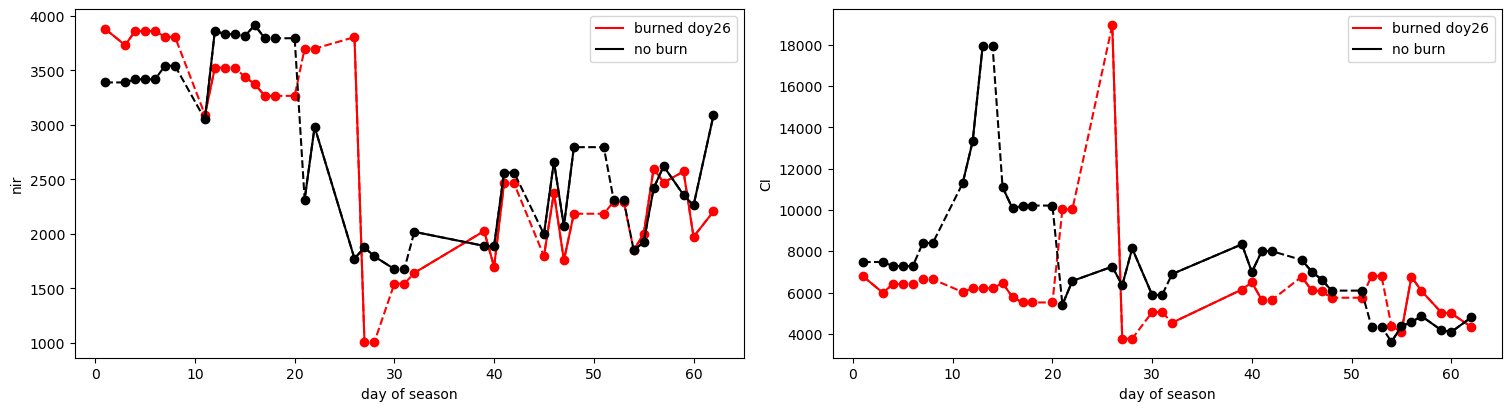

In [53]:
nir_dos['1_ffill'] = nir_dos['1'].ffill()
nir_dos['2_ffill'] = nir_dos['2'].ffill()
nir_dos['3_ffill'] = nir_dos['3'].ffill()
nir_dos['4_ffill'] = nir_dos['4'].ffill()

CI_dos['1_ffill'] = CI_dos['1'].ffill()
CI_dos['2_ffill'] = CI_dos['2'].ffill()
CI_dos['3_ffill'] = CI_dos['3'].ffill()
CI_dos['4_ffill'] = CI_dos['4'].ffill()

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 4), layout="constrained") 

axs[0].plot(nir_dos['1'], color='r', label='burned doy26')
axs[0].plot(nir_dos['1_ffill'], color='r', linestyle='--', marker='o')
#axs[0].plot(nir_dos['2'], color='k')
#axs[0].plot(nir_dos['2_ffill'], color='k', linestyle='--', marker='o')
#axs[0].plot(nir_dos['3'], color='k')
#axs[0].plot(nir_dos['3_ffill'], color='k', linestyle='--', marker='o')
axs[0].plot(nir_dos['4'], color='k', label='no burn')
axs[0].plot(nir_dos['4_ffill'], color='k', linestyle='--', marker='o')
axs[0].legend(loc="upper right")
axs[0].set_xlabel('day of season')
axs[0].set_ylabel('nir')

axs[1].plot(CI_dos['1'], color='r', label='burned doy26')
axs[1].plot(CI_dos['1_ffill'], color='r', linestyle='--', marker='o')
#axs[0].plot(nir_dos['2'], color='k')
#axs[0].plot(nir_dos['2_ffill'], color='k', linestyle='--', marker='o')
#axs[0].plot(nir_dos['3'], color='k')
#axs[0].plot(nir_dos['3_ffill'], color='k', linestyle='--', marker='o')
axs[1].plot(CI_dos['4'], color='k', label='no burn')
axs[1].plot(CI_dos['4_ffill'], color='k', linestyle='--', marker='o')
axs[1].legend(loc="upper right")
axs[1].set_xlabel('day of season')
axs[1].set_ylabel('CI')

In [ ]:
def load_ts_from_file(ts_file):
    ts = pd.read_csv(ts_file)
    ts.set_index('date', drop=True, inplace=True)
    ts.index = pd.to_datetime(ts.index)
    ts = ts.sort_index()

    return ts

masked_ts = load_ts_from_file(os.path.join(local_out_dir,'TS_nir_2019-2019_17polys_masked.csv'))
ts_dos_masked = convert_timeseries_to_doy(masked_ts, 2019, start_day=283, end_day=354, season=True)
unmasked_ts = load_ts_from_file(os.path.join(local_out_dir,'TS_nir_2019-2019_17polys_noMask.csv'))
ts_dos_unmasked = convert_timeseries_to_doy(unmasked_ts, 2019, start_day=283, end_day=354, season=True)
                                

fig = plt.figure(figsize=(10, 5))
plt.errorbar(ts_dos_unmasked.index, ts_dos_unmasked['ALL'], yerr=ts_dos_unmasked['stdv'], fmt='o', color='k')
plt.errorbar(ts_dos_masked.index, ts_dos_masked['ALL'], yerr=ts_dos_masked['stdv'], fmt='o', color='g')
plt.title('masked vs unmasked')
#plt.ylim(0,7000)
plt.show();     